Drei wichtige Begriffe in KI:

- **Regression**: eine kontinuierliche Zahl anhand gegebenen Features berechnen
- Klassifikation: eine Kategorie zuordnen
- Clustering: mögliche Kategorien erkennen

##### Regressionsanalyse

Bei der Regressionsanalyse geht es darum, anhand gegebenen nummerischen oder auch nicht nummerischen Daten eine _kontinuierliche Variable (eine Zahl)_ zu _berechnen_
<img src="https://www.visitberlin.de/system/files/styles/visitberlin_teaser_search_visitberlin_xxl_1x/private/image/Taxis_iStock.com_Foto%20Maxiphoto_DL_PPT_0.jpg.webp?itok=ChYObdaD" style="width:250px;"/>

### Taxi-Funktion

Wir wollen eine Funktion definieren, die die Anzahl von Kilometern als Argument akzeptiert und am die Fahrtgebühren berechnet. Wenn wir in ein Taxi einsteigen, berechnet der Taxifahrer eine feste Einstiegsgebühr von 7.50 Euro. Jedes Kilometer dann kostet 0.75 Euro. Also wenn jemand 10 Kilometer fährt, dann bezahlt er 10 x 0.75 + 7.50 also 15.00 Euro (Steueranteile inklusiv)

In [2]:
def taxi(k):
    return k*0.75 + 7.50

In [3]:
# 10 Kilometerfahrt
taxi(10)

15.0

Wie man sieht, die Fahrtgebühren berechnet man anhand Kilometer (Anzahl von Kilometern mal 0.75) und addiert mit einem festen Wert (7.5).

#### Lineare Gleichung
In Algebra nennt man diese Art Berechnung eine lineare Gleichung:
```python
    y = m * x  + n
```
In dieser Gleichung haben wir: 
- eine _abhängige Variable_ "y" - abhängig, weil "y"s Wert von "x", "m" und "n" abhängig berechnet wird. 
- eine _unabhängige Variable_ "x" - Anzahl der Kilometer kann _unabhängig_ sein
- einen sogenannten _Koeffizienten_ (engl. coefficient) "m": auch _Gewichtung_ genannt
- ein sogenanntes _Intercept_ (de. Schnittpunkt): fester Wert

In unserem Beispiel für Taxigebühren (Fahrtgebühren):
- Abhängige Variable: Fahrtkosten ('y')
- Unabhängige Variable: Anzahl der Kilometer ('x')
- Koeffizient: 0.75 Euro (Kilometerpreis) (m)
- Schnittpunkt (Intercept): 7.50 Euro (n)

In der Datenanalyse:

- heißt die _abhängige Variable_ auch _target_ oder _label_
- und die _unabhängige Variable_ auch _feature_ oder _attribute_

In der Regression muss oft der Wert eines Labels anhand gegebenen Features _eingeschätzt_ werden.  
Diese Einschätzung ist in der Tat eine Berechnung, die in meisten Fällen nicht hundertprozent genau sein kann.  
Das Ziel ist, anhand gegebenen Features den unbekannten _Koeffizienten_ und _Schnittpukt_ zu finden.

**Übung**  
Wir haben einige Streckenlängen in einer Variable `strecken` gespeichert:
```python
strecken = [6, 7.3, 10, 8, 3.5, 4.5, 11, 9, 12] 
```
Schreibe ein Programm, um die Fahrtgebühren für gegebenen Strecken in dieser Liste berechnet und diese in einer neuen Liste speichert.

In [4]:
# um die Zahlen aufzurunden
from math import ceil 
# Funktion
def taxi(k):
    return k*0.75 + 7.50
# Gegebene Strecken in Km
strecken = [6, 7.3, 10, 8, 3.5, 4.5, 11, 9, 12]
# Fahrtkosten
fahrtkosten = [ceil(taxi(strecke)) for strecke in strecken]
# Ausgabe
fahrtkosten

[12, 13, 15, 14, 11, 11, 16, 15, 17]

##### Tabellarische Darstellung von Daten
wir können aus `strecken` und `fahrtkosten` ein Dataframe erstellen:

In [5]:
strecken

[6, 7.3, 10, 8, 3.5, 4.5, 11, 9, 12]

In [6]:
fahrtkosten

[12, 13, 15, 14, 11, 11, 16, 15, 17]

In [7]:
import pandas as pd
# ein Dictionary aus Daten
data = {'strecke':strecken,
        'fahrtkosten':fahrtkosten}
# mit Pandas ein Dataframe aus Daten
df = pd.DataFrame(data)
# Ausgabe
df

,strecke,fahrtkosten
0,6.0,12
1,7.3,13
2,10.0,15
3,8.0,14
4,3.5,11
5,4.5,11
6,11.0,16
7,9.0,15
8,12.0,17


### Zusammenhänge verstehen

Wir bereits kennen die Funktion `taxi()` und wir haben selbst die Fahrtkosten anhand Streckenlängen mit dieser Funktion berechnet. Was wäre wenn, jemand diese Funktion nicht kennt und trotzdem den Zusammenhang zwischen Streckenlänge und die Fahrtkosten nachvollziehen möchte?  

Genauer gesagt, jemand möchte z.B. 20 Kilometer mit unserem Taxi fahren und möchte aber im Vorfeld und anhand der oben genannten Daten in Dataframe einschätzen, wie viel ungefähr diese Fahrt kosten würde. Wie geht man mit dieser Aufgabe um?

In diesem Beispiel haben wir mit einem typischen Problem der Regressionsanalyse bzw. -berechnung zu tun. Es geht dabei darum, wie aus den Zahlen in der Spalte 'strecke' die Zahlen in der Spalte 'fahrtkosten' zustande kommen.

##### Visualisierung
Eine wichtige und effektive Technik in der Reggressionsalanyse ist eine einfache Datenvisualisierung.

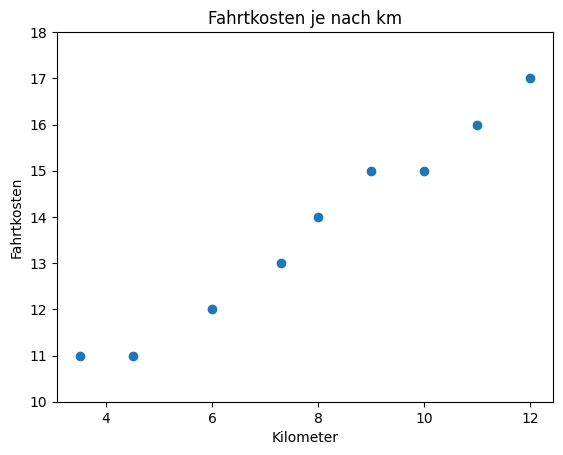

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x='strecke',
            y='fahrtkosten',
            data=df)

plt.ylim(min(fahrtkosten)-1,max(fahrtkosten)+1)
plt.xlabel('Kilometer')
plt.ylabel('Fahrtkosten')
plt.title('Fahrtkosten je nach km')
plt.show()

Dabei kann man versuchen, mit Hilfe einer _Gleichung_ ein grafisches Muster bilden, welches die Positionen der Datenpunkte auf dem Diagramm besser beschreiben kann.

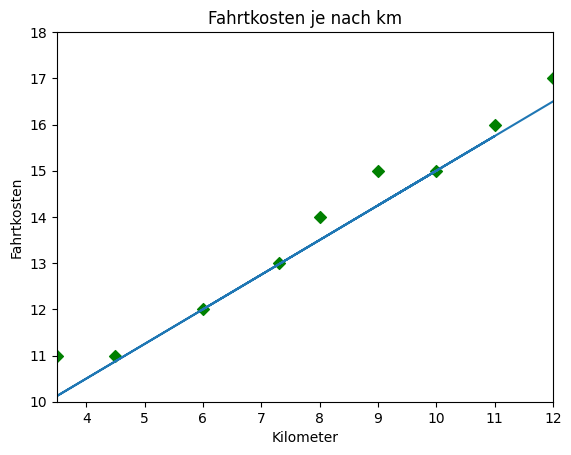

In [9]:
plt.scatter(x='strecke',
            y='fahrtkosten',
            data=df,
            marker='D',
            color='g')
plt.plot(strecken, 
         [taxi(strecke) for strecke in strecken])
plt.xlabel('Kilometer')
plt.ylabel('Fahrtkosten')
plt.title('Fahrtkosten je nach km')
plt.ylim(min(fahrtkosten)-1,max(fahrtkosten)+1)
plt.xlim(min(strecken),max(strecken))
plt.show()

Wir sehen dass viele von unseren Datenpunkte sehr nah an der blauen Gerade liegen.  
Das bedeutet, dass die Gleichung, die diese Gerade beschreibt, auch die Positionen (Koordinate) von unseren Datenpunkten mit etwas _Abweichung_ beschreiben kann.  
Hier können wir behaupten, dass die Fahrtkosten in einer gut bschreibbaren linearen Relation im Hinblick auf Kilometer-Anzahl stehen.  
Die Frage ist jetzt, wie man diese Relation genauer und mathematisch herausfinden kann?

Unser Ziel in dieser Aufgabe ist, eine Gleichung zu finden, die Anhand Kilometer-Anzahl die Fahrtkosten berechnet. Diese Gleichung kann quasi so aussehen:

``fahrtkosten = koef * kilometer + schnittpunkt``  
oder anders gesagt:  
``y = coefficient * x + intercept`` 

während der Schnittpunkt (intercept) den Treffpunkt der Gerade und der y-Achse darstellt.

### SciKit Learn

- ist eine 3rd-Party-Bibliothek (nicht in Standard-Library von Python): muss installiert werden
- enthält Algorithmen des maschnellen Lernens für Regressionsanalysen und viel mehr
- Dokumentation und Beispiel findet man hier: https://scikit-learn.org/stable/

#### Installation

In [10]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------- ----------------- 6.3/11.1 MB 35.1 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 36.5 MB/s eta 0:00:00


#### Ablauf jeder Aufgabe in Maschinelles Lernen

1. Wir erstellen ein Modell
2. dann trainieren wir das Modell anhand existierenden Daten
3. wir prüfen dann seine Lernfähigkeit und eventuell verbessern seine Leistung
4. und schließlich setzen wir es ein, um eine Einschätzung zu machen.

##### Scikit Learn importieren
Für unsere aktuelle Aufgabe brauchen wir ein Modell aus der Klasse `LinearRegression`

In [11]:
# importiere die Klasse LinearRegression
from sklearn.linear_model import LinearRegression

Wir gehen gleich die vier Schritte von oben durch:

1. Ein Modell erstellen
Ein Objekt der Klasse `LinearRegression` erzeugen:

In [12]:
model = LinearRegression() # ein Objekt der Klasse LinearRegression erzeugen = ein Modell erstellen

2. Modell trainieren
Bevor wir unser Modell trainieren, müssen wir unsere Daten in _Trainig_ und _Testing_ sets aufspalten. Die Daten müssen natürlich dabei groß genug sein, damit man diese Einteilen kann. Wir erstellen selbst diese Daten:

In [13]:
import numpy as np
np.random.seed(42)
# 500 Zufall-Strecken zwischen 5 und 100 Kilometer 
km = np.random.randint(5, 100, 500)
# Fahrtkosten als ganze Zahlen
tm = (km * 0.75 + 7.5).astype(int)
# Dataframe bilden
data = {'km':km, 'price':tm}
df = pd.DataFrame(data)
# dataframe prüfen
df.head()

,km,price
0,56,49
1,97,80
2,19,21
3,76,64
4,65,56


In [14]:
# shape
df.shape

(500, 2)

In [15]:
# die Funktion 'train_test_split' importieren
from sklearn.model_selection import train_test_split

In [16]:
X = df[['km']].to_numpy() # Feature-Set. in diesem Beispiel nur ein einziges Feature

In [17]:
y = df['price'].to_numpy() # Target (Ziel)

In [19]:
# help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, # ein 2-D Array aus den Features (unabhängigen Variablen)
                                                    y, # ein 1-D Array: Target (das, was wir einschätzen wollen)
                                                    test_size=0.25) # Wir testen das Modell mit 25% der Daten

Jetzt haben wir unser Lern- und Testdaten für unser Modell vorbereitet.  
Nun muss das Modell trainiert werden. Das geht ganz einfach mit der Methode `.fit()`

In [20]:
model.fit(X_train, y_train)

LinearRegression()

3. Modells Leistung testen
- Dazu gibt es mehrere Funktionen und Methoden, die je nach Algorithmus des Modells eingesetzt werden können.  
- Jede dieser Methoden funktioniert mit Bezug auf unterschiedlichen Maßzahlen (metrics) aus Statistik
- Diese Methoden können die Leistung eines Modells sowie in Trainingset als auch in Testingset ermitteln

In [21]:
model.score(X_train, y_train) # Leistung (Genauigkeit) mit Bezug auf Trainingset

0.9998154708185484

Diese Präzise bewegt sich zwischen 0 und 1, sodass eine Präzision von 1.0 bedeutet, dass das Modell mit 100% Genauigkeit die abhängige Variable anhand Features berechnen kann. Der Training-Score von unserem Model ist hier fast 100%

In [22]:
model.score(X_test, y_test) # Leistung (Genauigkeit) mit Bezug auf Testingset

0.9998373636667407

Wir sehen, dass unser Model einen Testing-Score von ca. 100% hat.

Dadurch das unser Modell eine sehr gute Genauigkeit in beiden Training- und Testing-Set aufweist, können wir davon ausgehen, dass dieses Modell für unsere Aufgabe sehr gut und geeignet ist.

4. Das Modell einsetzen, um Einschätzungen zu machen

In [23]:
my_way = np.array([[56], [19], [97]]) # solche Strecken möchte ich fahren. Wie hoch ist dann der Preis?

Damit wir unsere Gleichung nachbilden können, benötigen wir einen Koeffizienten `coef_` und den Schnittpunkt `intercept_`

In [24]:
model.coef_

array([0.75033386])

In [25]:
model.intercept_

np.float64(7.111963930062018)

Somit definieren wir eine Funktion, die dann Kilometer als Parameter annimmt und den Preis berechnet und zurückliefert:

In [26]:
def preis(km):
    return model.coef_[0] * km + model.intercept_

In [27]:
preis(my_way)

array([[49.13065985],
       [21.36830719],
       [79.89434794]])

Alternativ und üblich ist die Methode `predict()`, die man einsetzen kann:

In [28]:
model.predict(my_way)

array([49.13065985, 21.36830719, 79.89434794])

Und wir bekommen denselben Preis berechnet.